In [2]:
from main import getEdge
import argparse
from unittest import mock

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [61]:
import numpy as np
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import os
from math import sqrt
from datetime import datetime
from datetime import timedelta
import matplotlib.dates as mdates
from scipy import stats

from find_contours import canny_edge, contours_metadata

def BananaContours():
    directory="images/edged_img/"
    datetime_objects=[]
    files=[]
    banana_volume_list=[]
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            # files.append(os.path.join(directory,filename))
            # name, file_extension = os.path.splitext(filename)
            # last_underscore_index = name.rfind('_')
            # date_info = name[0:last_underscore_index]
            # banana_seq = int(name[-1])
            datetime_objects.append(datetime.strptime(filename,"image_%d-%m-%Y_%I-%M-%S_%p.png"))
            # datetime_objects.append(datetime.strptime(date_info,"%m_%d_%H_%M_%S"))
            # print("--",os.path.join(directory,filename))

    datetime_objects=sorted(datetime_objects)
    for d in datetime_objects:
        filename=d.strftime("image_%d-%m-%Y_%I-%M-%S_%p.png")
        files.append(os.path.join(directory,filename))
        # print("--",os.path.join(directory,filename))

    for f in files:
        edges = canny_edge(f)
        ret,thresh = cv2.threshold(edges,127,255,0)
        # img = cv2.imread(f,0)
        #ret,thresh = cv2.threshold(img,127,255,0)
        # blurred = cv2.GaussianBlur(img, (5, 5), 0)
        # value, thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY_INV)
        contours, hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
        metadata = contours_metadata(contours)
        minimum =metadata['area_min']
        median =metadata['area_median']
        maximum =metadata['area_max']
        area_avg = metadata['area_avg']
        area_std = metadata['area_std']
        q1=metadata['area_Q1']
        cnt_with_area =[]
        total_area = 0.0
        total_volume = 0.0
        # /** 針對average、standard deviation去篩選contours */
        for c in contours:
            #if cv2.contourArea(c)>(minimum)and \
             #cv2.contourArea(c)<(maximum):
            cnt_with_area.append(c)
            a = cv2.contourArea(c)
            total_area += a
            total_volume += sqrt(a)**3
        # print(len(cnt_with_area))

        # /** 使用Q1、medina、Q3來篩選contours
        # for c in contours:
        #     if cv2.contourArea(c)> median and \
        #         cv2.contourArea(c)< maximum :
        #         cnt_with_area.append(c)
        #         total_area += cv2.contourArea(c)

        read_filename = directory+ \
                        os.path.splitext(os.path.basename(f))[0] +\
                    '.png'
        print(read_filename)
        out_filename = 'images/result_pics/res_' + os.path.splitext(os.path.basename(f))[0] + '.png'
        result = cv2.drawContours(cv2.imread(read_filename), cnt_with_area, -1, (0,0,255), 2)
        cv2.imwrite(out_filename, result)

        ## 畫圖
        # if len(cnt_with_area)!=0.0:
        # print(total_area)
        # print(cnt_with_area)
        avg_area = total_area / len(cnt_with_area)

        banana_volume = sqrt(avg_area)**3
        avg_volume = total_volume / len(cnt_with_area)
        # banana_volume_list.append(banana_volume)
        # banana_volume_list.append(avg_volume)
        # banana_volume_list.append(total_volume)
        # banana_volume_list.append(total_area)
        banana_volume_list.append(avg_area)

    x = list(range(1, len(banana_volume_list)+1))

    x = [ i.toordinal() for i in datetime_objects ]
    y_dots = banana_volume_list

    def myfunc(x):
        return slope * x + intercept

    return datetime_objects, banana_volume_list
    '''
    slope, intercept, r, p, std_err = stats.linregress(x, y_dots)
    y_regression = list(map(myfunc, x))

    ax = plt.gca()
    formatter = mdates.DateFormatter("%b")
    ax.xaxis.set_major_formatter(formatter)

    locator = mdates.MonthLocator()
    ax.xaxis.set_major_locator(locator)

    formatter = mdates.DateFormatter("%d")
    ax.xaxis.set_minor_formatter(formatter)

    locator = mdates.DayLocator()
    ax.xaxis.set_minor_locator(locator)

    left_range = min(datetime_objects) - timedelta(days=1)
    right_range = max(datetime_objects) + timedelta(days=1)

    # ax.set_xlim([datetime(2020, 6, 10), datetime(2020, 7, 1)])
    ax.set_xlim([left_range, right_range])

    ax.scatter(x, y_dots)
    ax.plot(x, y_regression)
    plt.savefig("scatter.png")

    plt.show()
    '''

In [62]:
out = BananaContours()
print("finished")

images/edged_img/image_03-07-2020_01-00-21_AM.png
images/edged_img/image_04-07-2020_01-00-24_AM.png
images/edged_img/image_04-07-2020_01-00-54_PM.png
images/edged_img/image_05-07-2020_01-00-55_AM.png
images/edged_img/image_05-07-2020_01-01-55_AM.png
images/edged_img/image_06-07-2020_01-00-40_AM.png
images/edged_img/image_06-07-2020_01-00-11_PM.png
images/edged_img/image_07-07-2020_01-00-17_AM.png
images/edged_img/image_07-07-2020_01-00-32_PM.png
images/edged_img/image_08-07-2020_01-00-55_AM.png
images/edged_img/image_08-07-2020_01-00-40_PM.png
images/edged_img/image_09-07-2020_01-00-10_AM.png
images/edged_img/image_09-07-2020_01-00-22_PM.png
images/edged_img/image_10-07-2020_01-00-58_AM.png
images/edged_img/image_10-07-2020_01-00-23_PM.png
images/edged_img/image_11-07-2020_01-00-02_AM.png
images/edged_img/image_11-07-2020_01-00-25_PM.png
finished


c:\users\ccres\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\function_base.py:390: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
c:\users\ccres\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\users\ccres\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:3506: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
c:\users\ccres\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
c:\users\ccres\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\users\ccres\appdata\local\programs\python\python37\lib\

In [91]:
datetime_objects, y_dots = out

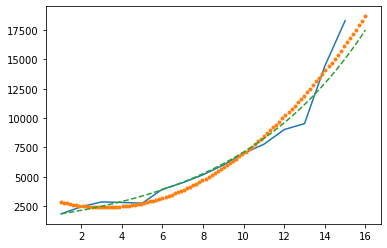

In [52]:

x = list(range(1, len(y)+1))
p3 = np.poly1d(np.polyfit(x, y, 2))
pexp = np.poly1d(np.polyfit(x, np.log(y), 1))
xp = np.linspace(1, len(y)+1, 100)
plt.plot(x, y, '-', xp, p3(xp), '.', xp, np.exp(pexp(xp)), '--')
plt.show()

In [ ]:

def draw_fitline(ax, x, y, pyplot_formatter, fit_type):
    p3 = np.poly1d(np.polyfit(x, y_dots, 3))
    pexp = np.poly1d(np.polyfit(x, np.log(y_dots), 1))
    xp = np.linspace(x[0], x[-1], 100)
    ax.plot(xp, p3(xp), '--')
    #print(xp)
    ax.plot(xp, np.exp(pexp(xp)), '--')
    

c:\users\ccres\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3326: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


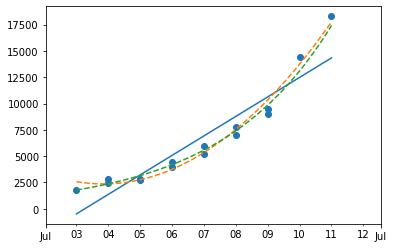

In [92]:
def myfunc(x):
    return slope * x + intercept

x = np.array([ i.toordinal() for i in datetime_objects ])
y_dots = np.array(y_dots)

filter_array = y_dots > 1000

x = x[filter_array]
y_dots = y_dots[filter_array]

slope, intercept, r, p, std_err = stats.linregress(x, y_dots)
y_regression = list(map(myfunc, x))


#x = list(range(1, len(y_dots)+1))


ax = plt.gca()
formatter = mdates.DateFormatter("%b")
ax.xaxis.set_major_formatter(formatter)

locator = mdates.MonthLocator()
ax.xaxis.set_major_locator(locator)

formatter = mdates.DateFormatter("%d")
ax.xaxis.set_minor_formatter(formatter)

locator = mdates.DayLocator()
ax.xaxis.set_minor_locator(locator)

left_range = min(datetime_objects) - timedelta(days=1)
right_range = max(datetime_objects) + timedelta(days=1)

# ax.set_xlim([datetime(2020, 6, 10), datetime(2020, 7, 1)])
ax.set_xlim([left_range, right_range])

ax.scatter(x, y_dots)
ax.plot(x, y_regression)



plt.savefig("scatter.png")

plt.show()